# import library

In [3]:
import requests
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sequences
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [4]:
response = requests.get('https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt')

In [5]:
response.text[:1500]

'This is the 100th Etext file presented by Project Gutenberg, and\nis presented in cooperation with World Library, Inc., from their\nLibrary of the Future and Shakespeare CDROMS.  Project Gutenberg\noften releases Etexts that are NOT placed in the Public Domain!!\n\nShakespeare\n\n*This Etext has certain copyright implications you should read!*\n\n<<THIS ELECTRONIC VERSION OF THE COMPLETE WORKS OF WILLIAM\nSHAKESPEARE IS COPYRIGHT 1990-1993 BY WORLD LIBRARY, INC., AND IS\nPROVIDED BY PROJECT GUTENBERG ETEXT OF ILLINOIS BENEDICTINE COLLEGE\nWITH PERMISSION.  ELECTRONIC AND MACHINE READABLE COPIES MAY BE\nDISTRIBUTED SO LONG AS SUCH COPIES (1) ARE FOR YOUR OR OTHERS\nPERSONAL USE ONLY, AND (2) ARE NOT DISTRIBUTED OR USED\nCOMMERCIALLY.  PROHIBITED COMMERCIAL DISTRIBUTION INCLUDES BY ANY\nSERVICE THAT CHARGES FOR DOWNLOAD TIME OR FOR MEMBERSHIP.>>\n\n*Project Gutenberg is proud to cooperate with The World Library*\nin the presentation of The Complete Works of William Shakespeare\nfor your

# Dataset preparation

Dataset cleaning

In dataset preparation step, we will first perform text cleaning of the data which includes removal of punctuations and lower casing all the words.

Convert the text to the lower case and the remove the data from \n

In [6]:
data=response.text.lower().split("\n")
data[0]

'this is the 100th etext file presented by project gutenberg, and'

In [7]:
len(data)

124457

In [8]:
data = " ".join(data)
data[:1000]

'this is the 100th etext file presented by project gutenberg, and is presented in cooperation with world library, inc., from their library of the future and shakespeare cdroms.  project gutenberg often releases etexts that are not placed in the public domain!!  shakespeare  *this etext has certain copyright implications you should read!*  <<this electronic version of the complete works of william shakespeare is copyright 1990-1993 by world library, inc., and is provided by project gutenberg etext of illinois benedictine college with permission.  electronic and machine readable copies may be distributed so long as such copies (1) are for your or others personal use only, and (2) are not distributed or used commercially.  prohibited commercial distribution includes by any service that charges for download time or for membership.>>  *project gutenberg is proud to cooperate with the world library* in the presentation of the complete works of william shakespeare for your reading for educati

In [9]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [10]:
def clean_text(file):
  tokens = file.split()#Split by Whitespace
  table = str.maketrans(' ', ' ', string.punctuation)#We can use the function maketrans() to create a mapping table
  tokens = [w.translate(table) for w in tokens]#Python offers a function called translate() that will map one set of characters to another.
  tokens = [word for word in tokens if word.isalpha()]#The isalpha() method returns True if all the characters are alphabet letters (a-z).
  return tokens

tokens = clean_text(data)
print(tokens[:50])

['this', 'is', 'the', 'etext', 'file', 'presented', 'by', 'project', 'gutenberg', 'and', 'is', 'presented', 'in', 'cooperation', 'with', 'world', 'library', 'inc', 'from', 'their', 'library', 'of', 'the', 'future', 'and', 'shakespeare', 'cdroms', 'project', 'gutenberg', 'often', 'releases', 'etexts', 'that', 'are', 'not', 'placed', 'in', 'the', 'public', 'domain', 'shakespeare', 'this', 'etext', 'has', 'certain', 'copyright', 'implications', 'you', 'should', 'read']


In [11]:
len(tokens)

899788

In [12]:
len(set(tokens))#total no words

28113

In [13]:
#here we predict the word 51th postion using 50th position
#divide our data in chunks of 51 words and at the last we will separate the last word from every line
length_sentence = 50 + 1
lines = []
for i in range(length_sentence, len(tokens)):
  seq = tokens[i-length_sentence:i]
  line = ' '.join(seq)
  lines.append(line)
  if i > 200000:#limit our dataset to 200000 words.
    break

print(len(lines))

199951


In [14]:
lines[0]

'this is the etext file presented by project gutenberg and is presented in cooperation with world library inc from their library of the future and shakespeare cdroms project gutenberg often releases etexts that are not placed in the public domain shakespeare this etext has certain copyright implications you should read this'

In [15]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)
sequences = tokenizer.texts_to_sequences(lines)#texts_to_sequences() transforms each text in texts to a sequence of integers.

In [16]:
sequences = np.array(sequences)

In [17]:
sequences [:100]

array([[  22,   11,    1, ...,   86,  610,   22],
       [  11,    1,  397, ...,  610,   22,  299],
       [   1,  397, 2006, ...,   22,  299,  539],
       ...,
       [ 524,  221,  228, ...,   14, 3185,    2],
       [ 221,  228,    2, ..., 3185,    2, 1265],
       [ 228,    2,   33, ...,    2, 1265, 6746]])

# # Now we will split each line such that the first 50 words are in X and the last word is in y.

In [18]:
sequences = np.array(sequences)
x, y = sequences[:, :-1], sequences[:,-1]

In [19]:
x[0]

array([   22,    11,     1,   397,  2006,  6743,    30,   398,   455,
           2,    11,  6743,    10,  6744,    15,   122,   486,   520,
          47,    65,   486,     5,     1,  2775,     2,   418, 13163,
         398,   455,   678, 13162,  2187,     9,    33,    12,  4811,
          10,     1,   848,  3823,   418,    22,   397,   236,   611,
         485, 13161,     6,    86,   610])

In [20]:
#tokenizer.word_index gives the mapping of each unique word to its numerical equivalent.
#tokenizer.word_index gives the vocab_size.
vocab_size = len(tokenizer.word_index) + 1

In [21]:
vocab_size

13165

In [22]:
y = to_categorical(y, num_classes=vocab_size)

In [23]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
seq_length = x.shape[1]
seq_length

50

In [25]:
model = Sequential()
# Add Input Embedding Layer
model.add(Embedding(vocab_size, 50, input_length=seq_length))
# Add Hidden Layer 1 LSTM Layer
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
#Add output layers
model.add(Dense(100, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 50)            658250    
_________________________________________________________________
lstm (LSTM)                  (None, 50, 100)           60400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dense_1 (Dense)              (None, 13165)             1329665   
Total params: 2,138,815
Trainable params: 2,138,815
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [28]:
history=model.fit(x, y, batch_size = 256, epochs = 5)

Epoch 1/5
782/782 [==============================] - 243s 311ms/step - loss: 6.8968 - accuracy: 0.0306
Epoch 2/5
782/782 [==============================] - 244s 312ms/step - loss: 6.5369 - accuracy: 0.0439
Epoch 3/5
782/782 [==============================] - 247s 316ms/step - loss: 6.3473 - accuracy: 0.0577
Epoch 4/5
782/782 [==============================] - 245s 314ms/step - loss: 6.1698 - accuracy: 0.0708
Epoch 5/5
782/782 [==============================] - 244s 312ms/step - loss: 6.0194 - accuracy: 0.0820


# if we increase epochs the accuracy increase

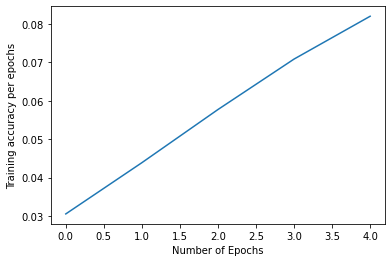

In [29]:
#plotting the training accuracy of the model
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.xlabel("Number of Epochs")
plt.ylabel('Training accuracy per epochs')
plt.show()

In [33]:
seed_text=lines[100]
seed_text

'is that which it contains and that is this and this with thee remains so are you to my thoughts as food to life or as sweetseasoned showers are to the ground and for the peace of you i hold such strife as twixt a miser and his wealth is found'

#  Generating the text
Great, our model architecture is now ready and we can train it using our data. Next lets write the function to predict the next word based on the input words (or seed text). We will first tokenize the seed text, pad the sequences and pass into the trained model to get predicted word. The multiple predicted words can be appended together to get predicted sequence.

In [43]:
def generate_text_seq(model, tokenizer, text_seq_length, seed_text, n_words):
  text = []

  for _ in range(n_words):
    encoded = tokenizer.texts_to_sequences([seed_text])[0]
    encoded = pad_sequences([encoded], maxlen = text_seq_length, truncating='pre')

    y_predict = model.predict_classes(encoded)

    predicted_word = ''
    for word, index in tokenizer.word_index.items():
      if index == y_predict:
        predicted_word = word
        break
    seed_text = seed_text + ' ' + predicted_word
    text.append(predicted_word)
  return ' '.join(text)

In [45]:
generate_text_seq(model, tokenizer, seq_length, seed_text, 10)

'the world and i have not not not not not'